In [43]:
#Description : This program attemps to optimise a users fianance portfolio using the Efficient Frontier

In [1]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [9]:
#Get the stock symbols/tickers in the portfolio
#FAANG 
assets = ['FB','AMZN','AAPL','NFLX','GOOG']

In [10]:
#Assign Weights to the Stocks.
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [11]:
#Get the stock/portfolio starting date
stockStartDate = '2013-01-01'

In [12]:
#Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-02-07'

In [13]:
#Create a dataframe to store the adjusted close proce of the stocks

#Store the adjusted close price of the stock into the df

df=pd.DataFrame()
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today)['Adj Close']


In [14]:
# Show the df

df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.939110,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.725300,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.259422,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.163778,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.207283,13.880000,365.280823
...,...,...,...,...,...
2022-02-01,319.000000,3023.870117,174.387817,457.130005,2757.570068
2022-02-02,323.000000,3012.250000,175.616257,429.480011,2960.729980
2022-02-03,237.759995,2776.909912,172.679993,405.600006,2853.010010


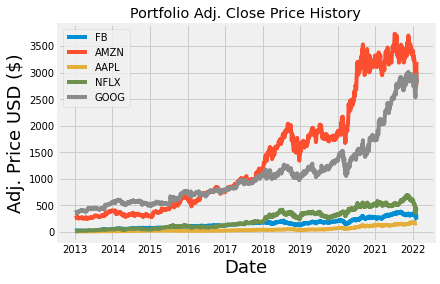

In [29]:
# Visually Show the stock / portfolio 
title = 'Portfolio Adj. Close Price History'

# Get the stocks

my_stocks = df

# Create and plot the graph 

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()


In [30]:
#Show the daily simple return
returns = df.pct_change()
returns 

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2022-02-01,0.018323,0.010831,-0.000973,0.070211,0.016065
2022-02-02,0.012539,-0.003843,0.007044,-0.060486,0.073674
2022-02-03,-0.263901,-0.078128,-0.016720,-0.055602,-0.036383


In [32]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252 
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.123098,0.055682,0.044641,0.057918,0.050706
AMZN,0.055682,0.093131,0.039912,0.062760,0.046686
AAPL,0.044641,0.039912,0.079834,0.035369,0.038255
NFLX,0.057918,0.062760,0.035369,0.206337,0.047658
GOOG,0.050706,0.046686,0.038255,0.047658,0.065767


In [33]:
#Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06109362895031672

In [34]:
#Calculate the portfolio volatility aka standard deviaition
port_volatility = np.sqrt(port_variance)
port_volatility 


0.247171254296119

In [36]:
# Calculate the annual portfolio returns
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3296376600116438

In [50]:
# Show the expected annunal return, volatility (risk), and variance

percent_var = str(round(port_variance, 2)* 100)+ '%'
percent_vols = str(round(port_volatility, 2)* 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn,2) * 100) + '%'

print('Expected annual retunr: '+ percent_ret)
print('Annual volatility / risk: ' + percent_vols)
print('Annual variance: '+ percent_var)

Expected annual retunr: 33.0%
Annual volatility / risk: 25.0%
Annual variance: 6.0%


In [51]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61 kB 5.9 MB/s 
     |████████████████████████████████| 2.7 MB 27.0 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [52]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [53]:
#PortFolio Optimization !

#Calulate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#optimize for max sharpe ratio

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.0), ('AMZN', 0.23896), ('AAPL', 0.37869), ('NFLX', 0.25327), ('GOOG', 0.12908)])
Expected annual return: 33.5%
Annual volatility: 25.0%
Sharpe Ratio: 1.26


(0.3353769835375384, 0.24987686414581636, 1.2621295877696754)

In [54]:
0.23896+0.37869+0.25327+0.12908

1.0

In [58]:
#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remainig: ${:.2f}'.format(leftover))

Discrete allocation: {'AMZN': 1, 'AAPL': 33, 'NFLX': 8, 'GOOG': 1}
Funds remainig: $41.75
